<a href="https://colab.research.google.com/github/maxjlake96/Python_Projects/blob/main/Weather_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing relevant packages and connecting to the API to retrieve data

In [ ]:
import requests
import pandas as pd

API_KEY = "b8c69a323eb3f9f3fbf490c48cb7c97c"  # make sure this is correct
city = "London"
url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units=metric"

response = requests.get(url)
data = response.json()

# Check the response keys
print(data.keys())  # Should include 'list' if successful
print(data)  # Optional: see full response for errors



dict_keys(['cod', 'message', 'cnt', 'list', 'city'])
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1755550800, 'main': {'temp': 19.49, 'feels_like': 19.24, 'temp_min': 18.74, 'temp_max': 19.49, 'pressure': 1018, 'sea_level': 1018, 'grnd_level': 1014, 'humidity': 67, 'temp_kf': 0.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'clouds': {'all': 100}, 'wind': {'speed': 3.91, 'deg': 84, 'gust': 8.43}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2025-08-18 21:00:00'}, {'dt': 1755561600, 'main': {'temp': 18.54, 'feels_like': 18.28, 'temp_min': 16.64, 'temp_max': 18.54, 'pressure': 1018, 'sea_level': 1018, 'grnd_level': 1014, 'humidity': 70, 'temp_kf': 1.9}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'clouds': {'all': 91}, 'wind': {'speed': 3.63, 'deg': 58, 'gust': 7.66}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2025-08-19 00:00:00'}, {'dt': 1

Creating a dataframe with from a list of dictionaries, where each dictionary extracts weather data from items in forecast_list

In [ ]:
# Extract forecast list
forecast_list = data['list']

# Flatten into a DataFrame
df = pd.DataFrame([{
    'datetime': f['dt_txt'],
    'temp': f['main']['temp'],
    'temp_min': f['main']['temp_min'],
    'temp_max': f['main']['temp_max'],
    'humidity': f['main']['humidity'],
    'pressure': f['main']['pressure'],
    'weather': f['weather'][0]['description'],
    'wind_speed': f['wind']['speed'],
    'wind_deg': f['wind']['deg']
} for f in forecast_list])

# Convert datetime to pandas datetime
df['datetime'] = pd.to_datetime(df['datetime'])

df.head()


,datetime,temp,temp_min,temp_max,humidity,pressure,weather,wind_speed,wind_deg
0,2025-08-18 21:00:00,19.49,18.74,19.49,67,1018,overcast clouds,3.91,84
1,2025-08-19 00:00:00,18.54,16.64,18.54,70,1018,overcast clouds,3.63,58
2,2025-08-19 03:00:00,16.18,14.52,16.18,77,1017,overcast clouds,3.27,46
3,2025-08-19 06:00:00,15.02,15.02,15.02,84,1017,overcast clouds,3.35,39
4,2025-08-19 09:00:00,19.03,19.03,19.03,69,1016,overcast clouds,4.22,60


Creating visualizations - one shows temperature over time, the other shows temperature vs humidity by weather condition.
You can see the seasonal trends in temperature, and you can see the negative correlation between humidity and temperature.

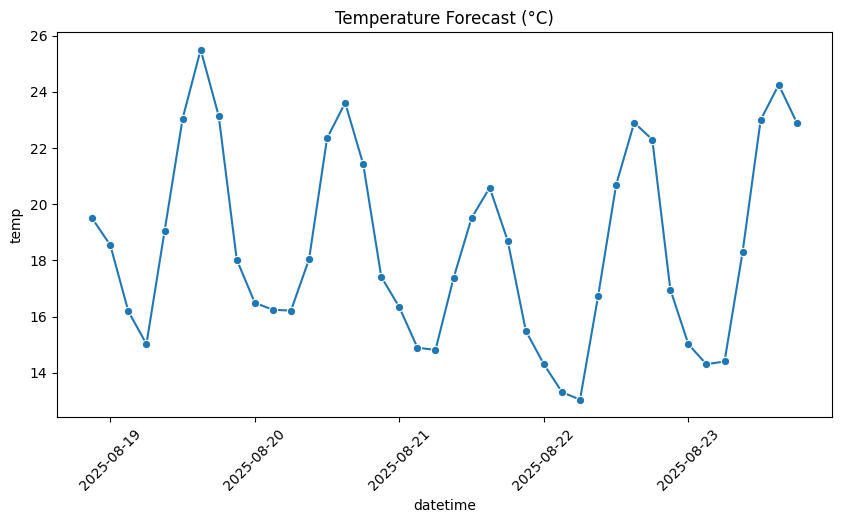

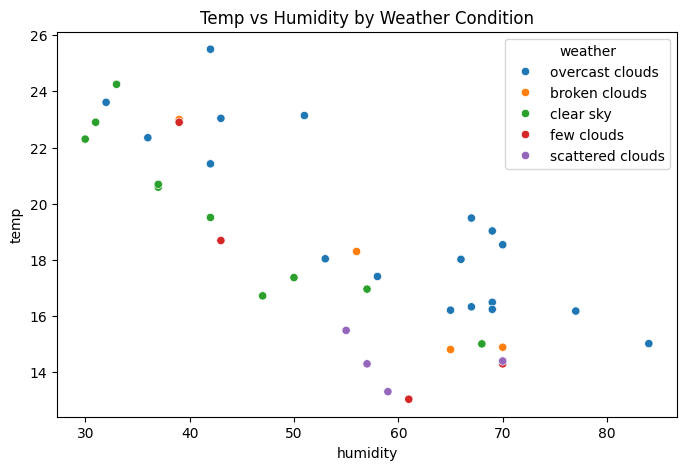

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='datetime', y='temp', marker='o')
plt.title('Temperature Forecast (°C)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='humidity', y='temp', hue='weather')
plt.title('Temp vs Humidity by Weather Condition')
plt.show()


This is showing some descriptive information about the data. This highlights that we are working with a very small dataset. This shows the averages and information about the data including whether the data is negatively or positively skewed.

In [ ]:
# Basic statistics
print(df.describe())

# Data types & nulls
print(df.info())

# Unique values per column
print(df.nunique())


                  datetime       temp   temp_min   temp_max   humidity  \
count                   40  40.000000  40.000000  40.000000  40.000000   
mean   2025-08-21 07:30:00  18.494750  18.387000  18.494750  54.400000   
min    2025-08-18 21:00:00  13.040000  13.040000  13.040000  30.000000   
25%    2025-08-20 02:15:00  16.007500  15.372500  16.007500  42.000000   
50%    2025-08-21 07:30:00  18.030000  17.715000  18.030000  56.500000   
75%    2025-08-22 12:45:00  21.640000  21.640000  21.640000  67.250000   
max    2025-08-23 18:00:00  25.500000  25.500000  25.500000  84.000000   
std                    NaN   3.435722   3.481994   3.435722  14.575709   

          pressure  wind_speed    wind_deg  
count    40.000000   40.000000   40.000000  
mean   1018.250000    3.618250   67.950000  
min    1014.000000    0.960000    0.000000  
25%    1016.000000    2.350000   20.500000  
50%    1018.000000    4.065000   36.000000  
75%    1021.000000    4.952500   80.250000  
max    1022.000000

This shows the correlation matrix - the relationship between each variable. You can see the strong correlations between temp and humidity, and also wind speed and pressure.

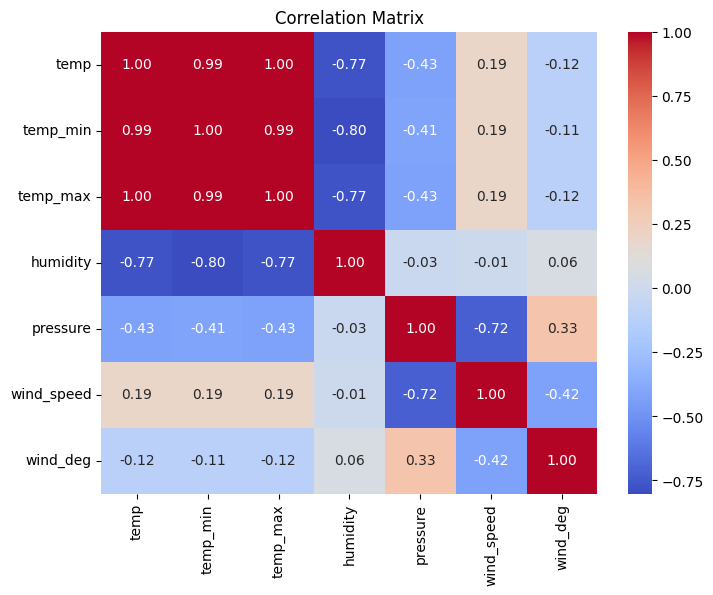

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


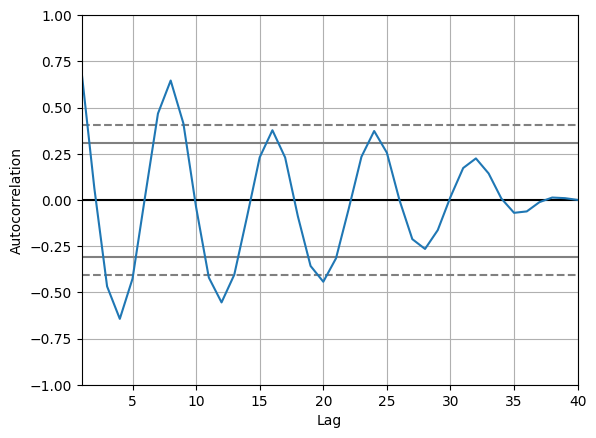

Cross-correlation (Temp vs Humidity): -0.77


In [ ]:
from pandas.plotting import autocorrelation_plot

# Example: autocorrelation of temperature
autocorrelation_plot(df['temp'])
plt.show()

# Cross-correlation between temperature & humidity
cross_corr = df['temp'].corr(df['humidity'])
print(f"Cross-correlation (Temp vs Humidity): {cross_corr:.2f}")


This is looking at the average temperature by weather condition - showing clear sky having the highest average temp in this dataset

weather
clear sky           19.630000
overcast clouds     19.225556
broken clouds       17.750000
few clouds          17.232500
scattered clouds    14.375000
Name: temp, dtype: float64


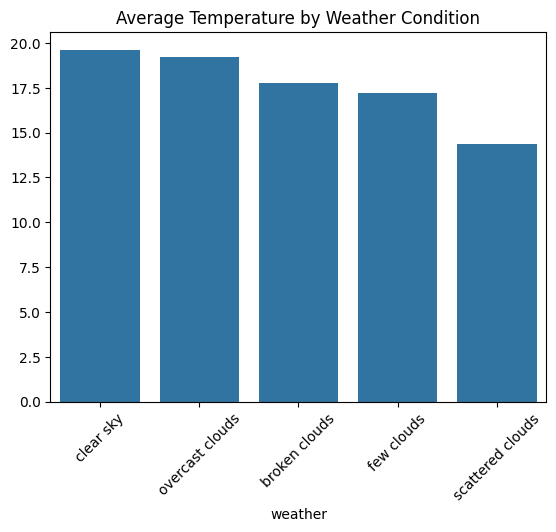

In [ ]:
cond_avg_temp = df.groupby('weather')['temp'].mean().sort_values(ascending=False)
print(cond_avg_temp)

sns.barplot(x=cond_avg_temp.index, y=cond_avg_temp.values)
plt.xticks(rotation=45)
plt.title("Average Temperature by Weather Condition")
plt.show()


In [ ]:
df['day'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['is_weekend'] = df['datetime'].dt.weekday >= 5


Using Prophet for time series forecasting:
1. Prepare data with columns 'ds' (datetime) and 'y' (value to forecast).
2. Fit Prophet model on historical data.
3. Create a future dataframe (e.g. next 48 hours, hourly).
4. Predict future values (yhat) with confidence intervals.
5. Plot results: actual data, forecast line, and uncertainty bands.


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4l223q2h/a66mfj9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4l223q2h/3nqy058x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72476', 'data', 'file=/tmp/tmp4l223q2h/a66mfj9b.json', 'init=/tmp/tmp4l223q2h/3nqy058x.json', 'output', 'file=/tmp/tmp4l223q2h/prophet_modelrl1f6mwr/prophet_model-20250818195045.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:50:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packag

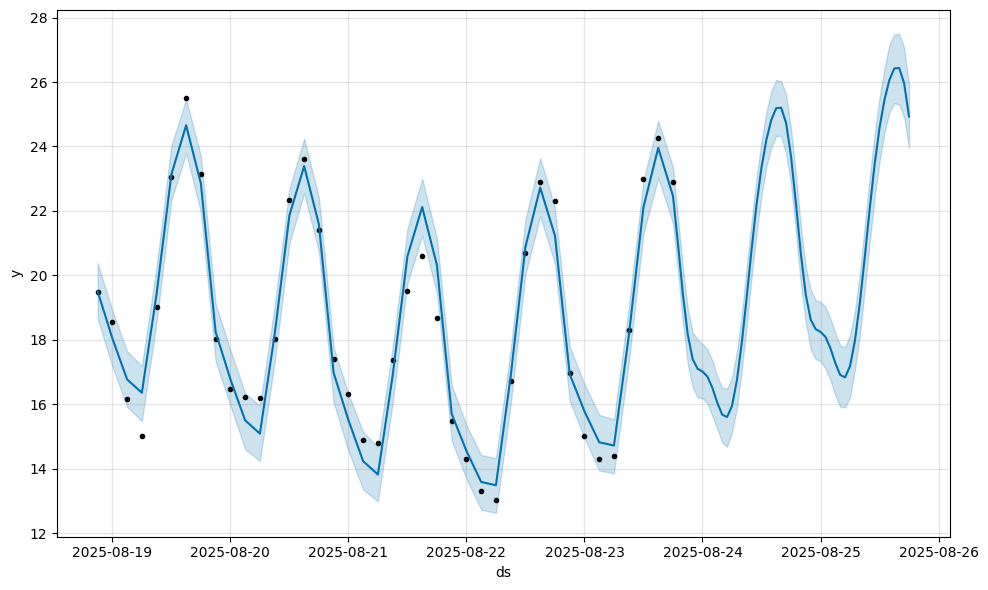

In [ ]:
from prophet import Prophet

prophet_df = df[['datetime', 'temp']].rename(columns={'datetime':'ds', 'temp':'y'})
model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=48, freq='H')
forecast = model.predict(future)

model.plot(forecast)
plt.show()


# Deep learning forecasting

Train the model:
- 20 passes over the data (epochs)
- 32 samples per step (batch size)
- 20% of data used for validation
- Shows progress while training
'history' saves the training results


In [ ]:
history = model.fit(
    X, y,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1735 - val_loss: 0.5440
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 0.1457 - val_loss: 0.4771
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.1205 - val_loss: 0.4135
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1003 - val_loss: 0.3519
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0881 - val_loss: 0.2923
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0776 - val_loss: 0.2364
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0765 - val_loss: 0.1915
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0824 - val_loss: 0.1677
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0876 - val_loss: 0.1640
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0878 - val_loss: 0.1721
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0880 - val_loss: 0.1871
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0833 - val_loss: 0.2056


Showing actual vs. predicted - you can see the lack of seasonality within the prediction so will try to improve in the next step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


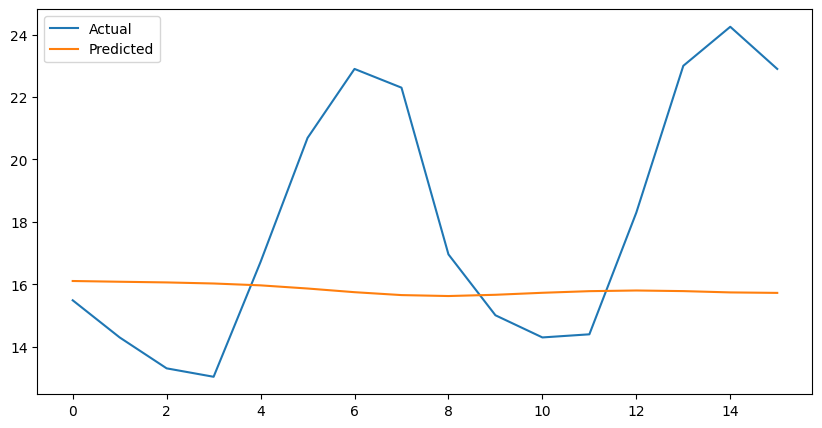

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(y.reshape(-1,1)), label="Actual")
plt.plot(scaler.inverse_transform(y_pred), label="Predicted")
plt.legend()
plt.show()


LSTM Weather Forecasting Workflow:
1. Preprocess data:
   - Select features (temp, humidity, etc.)
   - Scale values to [0,1] for neural network stability

2. Create sequences:
   - Use last SEQ_LEN (5) timesteps as input
   - Predict next temperature value

3. Build & train LSTM model:
   - Stacked LSTM layers with dropout (prevent overfitting)
   - Optimizer: Adam, Loss: MSE
   - Train on 70% data, validate on 30%

4. Predict & evaluate:
   - Model forecasts future temps from test data
   - Inverse-scale predictions back to original range
   - Plot actual vs predicted temperatures


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - loss: 0.2359 - val_loss: 0.2478
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1508 - val_loss: 0.1619
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0783 - val_loss: 0.1061
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0783 - val_loss: 0.0857
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0945 - val_loss: 0.0819
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0825 - val_loss: 0.0872
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0600 - val_loss: 0.0974
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0572 - val_loss: 0.1079
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0464 - val_loss: 0.1154
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0510 - val_loss: 0.1144
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0450 - val_loss: 0.1078
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0396 - val_loss: 0.0916
Epoch 13/50

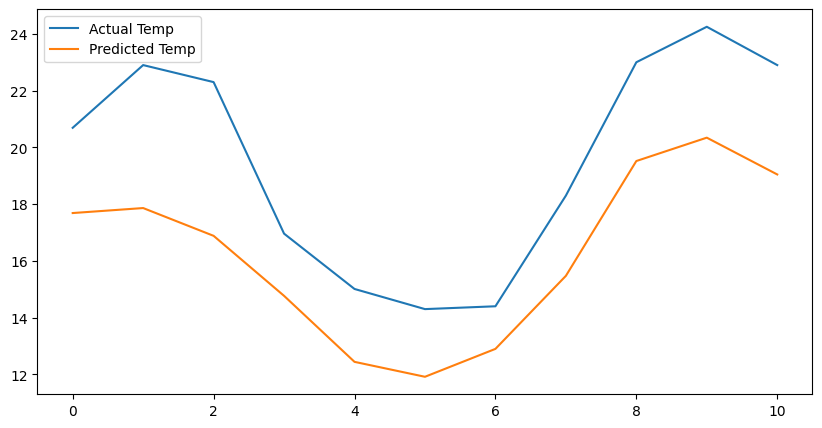

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# ---------------------------
# 1. Load your weather data
# ---------------------------
# Keep relevant features
features = ['temp', 'humidity', 'pressure', 'wind_speed']
data = df[features].values

# Scale features to [0,1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# ---------------------------
# 2. Create sequences
# ---------------------------
def create_sequences(data, seq_len=5):
    X, y = [], []
    for i in range(len(data)-seq_len):
        X.append(data[i:i+seq_len])       # past seq_len steps
        y.append(data[i+seq_len, 0])      # predict "temp" next step
    return np.array(X), np.array(y)

SEQ_LEN = 5
X, y = create_sequences(data_scaled, SEQ_LEN)

# Train/test split
split = int(len(X)*0.7)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ---------------------------
# 3. Build LSTM model
# ---------------------------
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(SEQ_LEN, X.shape[2])),
    Dropout(0.3),
    LSTM(64),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# ---------------------------
# 4. Predictions
# ---------------------------
y_pred = model.predict(X_test)

# Inverse scale for plotting
# Only inverse the temp column
temp_scaler = MinMaxScaler()
temp_scaler.min_, temp_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

y_test_inv = (y_test - scaler.min_[0]) / scaler.scale_[0]
y_pred_inv = (y_pred.flatten() - scaler.min_[0]) / scaler.scale_[0]

# Plot
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label="Actual Temp")
plt.plot(y_pred_inv, label="Predicted Temp")
plt.legend()
plt.show()
